In [1]:
from gurobipy import *
# Example data for problem
cost = [100, 100, 100, 100, 200, 200];
value = [50, 150, 150, 150, 300, 50];
edges = [[4,0], [4,1], [4,2], [5,1], [5,2], [5,3]];

m = Model()
n = len(cost) # number of blocks

# Indicator variable for each block
x = {}
for i in range(n):
   x[i] = m.addVar(vtype=GRB.BINARY, name="x%d" % i)

m.update()

# Set objective
m.setObjective(quicksum((value[i] - cost[i])*x[i] for i in range(n)), GRB.MAXIMIZE)

# Add constraints
for edge in edges:
   u = edge[0]
   v = edge[1]
   m.addConstr(x[u] <= x[v])

m.optimize()

Academic license - for non-commercial use only
Optimize a model with 6 rows, 6 columns and 12 nonzeros
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 150.0000000
Found heuristic solution: objective 200.0000000
Presolve removed 6 rows and 6 columns
Presolve time: 0.47s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.59 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 200 150 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+02, best bound 2.000000000000e+02, gap 0.0000%


In [ ]:
# https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# pequeña modificacion de la clase FancyArrowPatch para plotear flechas en python
import numpy as np
#from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
import math



class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

import pandas as pd
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#input_path = '../Blasor_inputs/MB_LoA20_v2.csv'
input_path = '../Daniel_inputs/block_model.csv'
MB = pd.read_csv(input_path)

In [23]:
ejex_MB = MB.sort_values(by=['xcentre'],ascending=False)[['xcentre']]
ejey_MB = MB.sort_values(by=['ycentre'],ascending=False)[['ycentre']]
ejez_MB = MB.sort_values(by=['zcentre'],ascending=False)[['zcentre']]
pos_x_MB = np.unique(ejex_MB.values)
pos_y_MB = np.unique(ejey_MB.values)
pos_z_MB = np.unique(ejez_MB.values)

[72610. 72630. 72650. 72670. 72690. 72710. 72730. 72750. 72770. 72790.
 72810. 72830. 72850. 72870. 72890. 72910. 72930. 72950. 72970. 72990.
 73010. 73030. 73050. 73070. 73090. 73110. 73130. 73150. 73170. 73190.
 73210. 73230. 73250. 73270. 73290. 73310. 73330. 73350. 73370. 73390.
 73410. 73430. 73450. 73470. 73490. 73510. 73530. 73550. 73570. 73590.
 73610. 73630. 73650. 73670. 73690. 73710. 73730. 73750. 73770. 73790.
 73810. 73830. 73850. 73870. 73890. 73910. 73930. 73950. 73970. 73990.
 74010. 74030. 74050. 74070. 74090. 74110. 74130. 74150. 74170. 74190.
 74210. 74230. 74250. 74270. 74290. 74310. 74330. 74350. 74370. 74390.
 74410. 74430. 74450. 74470. 74490. 74510. 74530. 74550. 74570. 74590.
 74610. 74630. 74650. 74670. 74690. 74710. 74730. 74750. 74770. 74790.
 74810. 74830. 74850. 74870. 74890. 74910. 74930. 74950. 74970. 74990.
 75010. 75030. 75050. 75070. 75090. 75110. 75130. 75150. 75170. 75190.
 75210. 75230. 75250. 75270. 75290. 75310. 75330. 75350. 75370. 75390.
 75410

In [28]:
cols = MB.keys().tolist()
print('Nombres de las columnas:',cols)

Nombres de las columnas: ['xcentre', 'ycentre', 'zcentre', 'calcosina', 'cut', 'cufe', 'rec_max_block']


In [32]:
N = 3
pos_z_MB[3]

447.5

In [41]:
# recuperar las dimensiones del modelo de bloques
# se utilizan las dimensiones en todas las direcciones
# para determinar el conjunto de aracos. Considerar 
#primero una cantidad mas pequeña de bloques, i.e. de niveles
# en el eje z
N = 4 # numero de ptos pos dimension
MB_sorted = MB.sort_values(by=['zcentre'],ascending=False)
MB_sorted = MB_sorted.loc[MB_sorted['zcentre']<pos_z_MB[N]]
MB_sorted = MB_sorted.loc[MB_sorted['xcentre']<pos_x_MB[N]]
MB_sorted = MB_sorted.loc[MB_sorted['ycentre']<pos_y_MB[N]]

pos_z = MB_sorted[['zcentre']].values
pos_x = MB_sorted[['xcentre']].values
pos_y = MB_sorted[['ycentre']].values

# eliminar repeticiones de las posiciones
# para determinar dimensiones del modelo
# de bloques
pos_z_unique = np.unique(pos_z)
pos_y_unique = np.unique(pos_y)
pos_x_unique = np.unique(pos_x)

# usar la notacion de lerchs-grossmann algorithm with
# variables slopes angles.
numx = np.size(pos_x_unique)
numy = np.size(pos_y_unique)
numz = np.size(pos_z_unique)

print('numx: ',numx)
print('numy: ',numy)
print('numz: ',numz)

# determinar dimensiones del modelo de bloques
zdim =  pos_z_unique[1]-pos_z_unique[0]
xdim =  pos_x_unique[1]-pos_x_unique[0]
ydim =  pos_y_unique[1]-pos_y_unique[0]

print('xdim: ',xdim)
print('ydim: ',ydim)
print('zdim: ',zdim)

numx:  4
numy:  4
numz:  4
xdim:  20.0
ydim:  20.0
zdim:  15.0


In [55]:
theta = np.arctan(4/4)
theta

0.7853981633974483

In [42]:
# determianr conjunto de arcos
# dados los angulos theta en las
# direcciones principales. Como primer
# ejercicio se consideraron todos iguales
theta_n = np.pi/4
theta_s = np.pi/6
theta_w = np.pi/6
theta_e = np.pi/6
arcos = []
dicc_semiejes = {}
for k in range(1,numz+1):
    for i in range(1,numx+1):
        for j in range(1,numy+1):
            for t in range(1,k):
                #dx1 = (k-t)*zdim/np.tan(theta_w)
                #dy1 = (k-t)*zdim/np.tan(theta_s)
                #dx2 = (k-t)*zdim/np.tan(theta_e)
                #dy2 = (k-t)*zdim/np.tan(theta_n)
                
                dx1 = t*zdim/np.tan(theta_w)
                dy1 = t*zdim/np.tan(theta_s)
                dx2 = t*zdim/np.tan(theta_e)
                dy2 = t*zdim/np.tan(theta_n)
                
                m1 = dx1/xdim
                n1 = dy1/ydim
                m2 = dx2/xdim
                n2 = dy2/ydim
                print('###################################')
                print('nivel t=',t,'.bloque base:',(i,j,k),'.semi-ejes: dx1 = %.2f, dy1 = %.2f, dx2 = %.2f, dy2 = %.2f' % (dx1,dy1,dx2,dy2))
                print('Parametros de las cantidades de bloques: m1=%.2f, n1=%.2f, m2=%.2f, n2=%.2f' % (m1,n1,m2,n2))
                for m in range(max(math.floor(i-m2),1),min(numx,math.ceil(i+m1))+1):
                    for n in range(max(math.floor(j-n2),1),min(numy,math.ceil(j+n1))+1):
                        print()
                        a = xdim*(i-m)
                        b = ydim*(j-n)
                        print('*********** Distancia del bloque X_{%.2f,%.2f,%.f} ***********' % (m,n,k-t))
                        print('a=%.2f, b=%.2f' % (a,b))
                        a2 = a**2
                        b2 = b**2
                        if m>=i and n>=j:
                            Value = a2/(dx1**2) +b2/(dy1**2)
                        elif m>=i and n<=j:
                            Value = a2/(dx1**2) +b2/(dy2**2)
                        elif m<=i and n<=j:
                            Value = a2/(dx2**2) +b2/(dy2**2)
                        #elif m<=i and n>=j:
                        else:
                            Value = a2/(dx2**2) +b2/(dy1**2)
                        if Value<=1:
                            arcos.append([(i,j,k),(m,n,k-t)])

###################################
nivel t= 1 .bloque base: (1, 1, 2) .semi-ejes: dx1 = 25.98, dy1 = 25.98, dx2 = 25.98, dy2 = 15.00
Parametros de las cantidades de bloques: m1=1.30, n1=1.30, m2=1.30, n2=0.75

*********** Distancia del bloque X_{1.00,1.00,1} ***********
a=0.00, b=0.00

*********** Distancia del bloque X_{1.00,2.00,1} ***********
a=0.00, b=-20.00

*********** Distancia del bloque X_{1.00,3.00,1} ***********
a=0.00, b=-40.00

*********** Distancia del bloque X_{2.00,1.00,1} ***********
a=-20.00, b=0.00

*********** Distancia del bloque X_{2.00,2.00,1} ***********
a=-20.00, b=-20.00

*********** Distancia del bloque X_{2.00,3.00,1} ***********
a=-20.00, b=-40.00

*********** Distancia del bloque X_{3.00,1.00,1} ***********
a=-40.00, b=0.00

*********** Distancia del bloque X_{3.00,2.00,1} ***********
a=-40.00, b=-20.00

*********** Distancia del bloque X_{3.00,3.00,1} ***********
a=-40.00, b=-40.00
###################################
nivel t= 1 .bloque base: (1, 2, 2) .s


*********** Distancia del bloque X_{2.00,3.00,1} ***********
a=40.00, b=-40.00

*********** Distancia del bloque X_{2.00,4.00,1} ***********
a=40.00, b=-60.00

*********** Distancia del bloque X_{3.00,1.00,1} ***********
a=20.00, b=0.00

*********** Distancia del bloque X_{3.00,2.00,1} ***********
a=20.00, b=-20.00

*********** Distancia del bloque X_{3.00,3.00,1} ***********
a=20.00, b=-40.00

*********** Distancia del bloque X_{3.00,4.00,1} ***********
a=20.00, b=-60.00

*********** Distancia del bloque X_{4.00,1.00,1} ***********
a=0.00, b=0.00

*********** Distancia del bloque X_{4.00,2.00,1} ***********
a=0.00, b=-20.00

*********** Distancia del bloque X_{4.00,3.00,1} ***********
a=0.00, b=-40.00

*********** Distancia del bloque X_{4.00,4.00,1} ***********
a=0.00, b=-60.00
###################################
nivel t= 1 .bloque base: (4, 2, 3) .semi-ejes: dx1 = 25.98, dy1 = 25.98, dx2 = 25.98, dy2 = 15.00
Parametros de las cantidades de bloques: m1=1.30, n1=1.30, m2=1.30, n2=0.7

a=-40.00, b=-40.00
###################################
nivel t= 1 .bloque base: (2, 3, 4) .semi-ejes: dx1 = 25.98, dy1 = 25.98, dx2 = 25.98, dy2 = 15.00
Parametros de las cantidades de bloques: m1=1.30, n1=1.30, m2=1.30, n2=0.75

*********** Distancia del bloque X_{1.00,2.00,3} ***********
a=20.00, b=20.00

*********** Distancia del bloque X_{1.00,3.00,3} ***********
a=20.00, b=0.00

*********** Distancia del bloque X_{1.00,4.00,3} ***********
a=20.00, b=-20.00

*********** Distancia del bloque X_{2.00,2.00,3} ***********
a=0.00, b=20.00

*********** Distancia del bloque X_{2.00,3.00,3} ***********
a=0.00, b=0.00

*********** Distancia del bloque X_{2.00,4.00,3} ***********
a=0.00, b=-20.00

*********** Distancia del bloque X_{3.00,2.00,3} ***********
a=-20.00, b=20.00

*********** Distancia del bloque X_{3.00,3.00,3} ***********
a=-20.00, b=0.00

*********** Distancia del bloque X_{3.00,4.00,3} ***********
a=-20.00, b=-20.00

*********** Distancia del bloque X_{4.00,2.00,3} **********

*********** Distancia del bloque X_{3.00,4.00,1} ***********
a=20.00, b=-40.00

*********** Distancia del bloque X_{4.00,1.00,1} ***********
a=0.00, b=20.00

*********** Distancia del bloque X_{4.00,2.00,1} ***********
a=0.00, b=0.00

*********** Distancia del bloque X_{4.00,3.00,1} ***********
a=0.00, b=-20.00

*********** Distancia del bloque X_{4.00,4.00,1} ***********
a=0.00, b=-40.00
###################################
nivel t= 1 .bloque base: (4, 3, 4) .semi-ejes: dx1 = 25.98, dy1 = 25.98, dx2 = 25.98, dy2 = 15.00
Parametros de las cantidades de bloques: m1=1.30, n1=1.30, m2=1.30, n2=0.75

*********** Distancia del bloque X_{2.00,2.00,3} ***********
a=40.00, b=20.00

*********** Distancia del bloque X_{2.00,3.00,3} ***********
a=40.00, b=0.00

*********** Distancia del bloque X_{2.00,4.00,3} ***********
a=40.00, b=-20.00

*********** Distancia del bloque X_{3.00,2.00,3} ***********
a=20.00, b=20.00

*********** Distancia del bloque X_{3.00,3.00,3} ***********
a=20.00, b=0.00

***

In [15]:
# modelo de bloques con recuperacion positiva
MB_rec_pos = MB.loc[MB['rec_max_block']>0]
MB_rec_pos_sorted = MB_rec_pos.sort_values(by=['zcentre'],ascending=False)
pos_z_rec_pos = MB_rec_pos_sorted[['zcentre']].values
np.unique(pos_z_rec_pos)

array([ 402.5,  417.5,  432.5,  447.5,  462.5,  477.5,  492.5,  507.5,
        522.5,  537.5,  552.5,  567.5,  582.5,  597.5,  612.5,  627.5,
        642.5,  657.5,  672.5,  687.5,  702.5,  717.5,  732.5,  747.5,
        762.5,  777.5,  792.5,  807.5,  822.5,  837.5,  852.5,  867.5,
        882.5,  897.5,  912.5,  927.5,  942.5,  957.5,  972.5,  987.5,
       1002.5, 1017.5, 1032.5, 1047.5, 1062.5, 1077.5, 1092.5, 1107.5,
       1122.5, 1137.5, 1152.5, 1167.5, 1182.5, 1197.5, 1212.5, 1227.5,
       1242.5, 1257.5, 1272.5, 1287.5, 1302.5, 1317.5, 1332.5, 1347.5,
       1362.5, 1377.5, 1392.5, 1407.5, 1422.5, 1437.5, 1452.5, 1467.5,
       1482.5, 1497.5, 1512.5, 1527.5, 1542.5, 1557.5, 1572.5, 1587.5,
       1602.5, 1617.5, 1632.5, 1647.5, 1662.5])

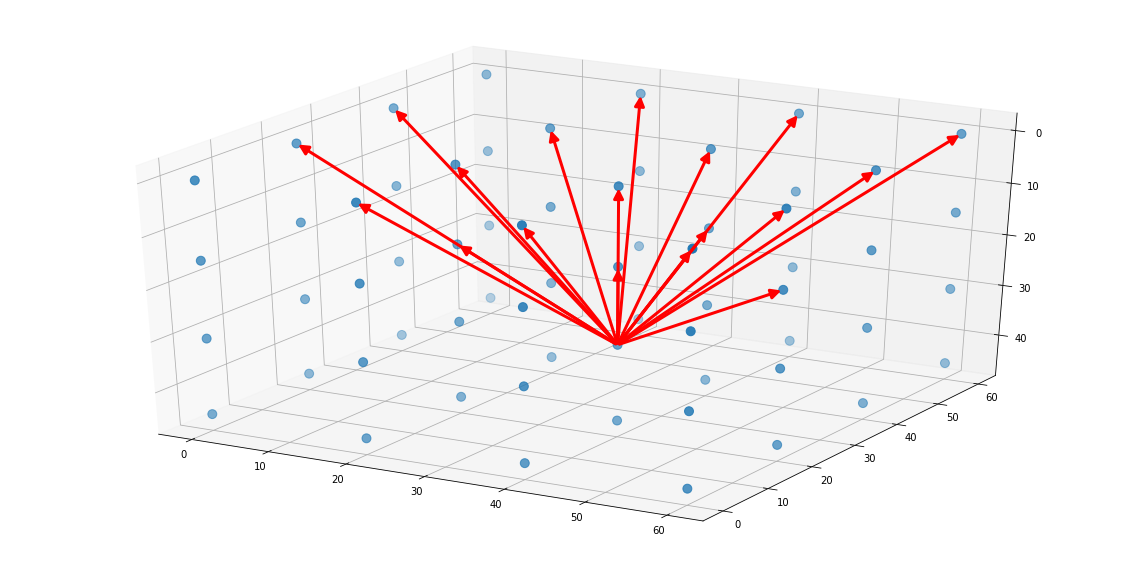

In [43]:
bloque_base = (3,2,3)
sacar = []
for arco in arcos:
    bloque_tail = arco[0]
    bloque_head = arco[1]
    if bloque_base==bloque_tail:
        sacar.append(bloque_head)

MB_grafico = MB_sorted[['xcentre','ycentre','zcentre']]-(min(MB_sorted[['xcentre']].values),min(MB_sorted[['ycentre']].values),min(MB_sorted[['zcentre']].values))
ejex = MB_grafico[['xcentre']]
ejey = MB_grafico[['ycentre']]
ejez = MB_grafico[['zcentre']]



fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
plt.gca().invert_zaxis()

for v in sacar:
    #ax.plot([mean_x,v[0]], [mean_y,v[1]], [mean_z,v[2]], color='red', alpha=0.8, lw=3)
    #I will replace this line with:
    a = Arrow3D([(bloque_base[0]-1)*20, (v[0]-1)*20], [(bloque_base[1]-1)*20, (v[1]-1)*20], 
                [(bloque_base[2]-1)*15, (v[2]-1)*15], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.scatter(ejex,ejey,ejez,s=80)

In [1]:
# ejemplo de grafico in mayavi
import numpy as np
import mayavi.mlab as m
m.init_notebook()

p0 = [0.799319, -3.477045e-01, 0.490093]
p1 = [0.852512, 9.113778e-16, -0.522708]
p2 = [0.296422, 9.376042e-01, 0.181748]

origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(p0,p1,p2)
m.quiver3d(X,Y,Z,U,V,W)

Notebook initialized with x3d backend.
